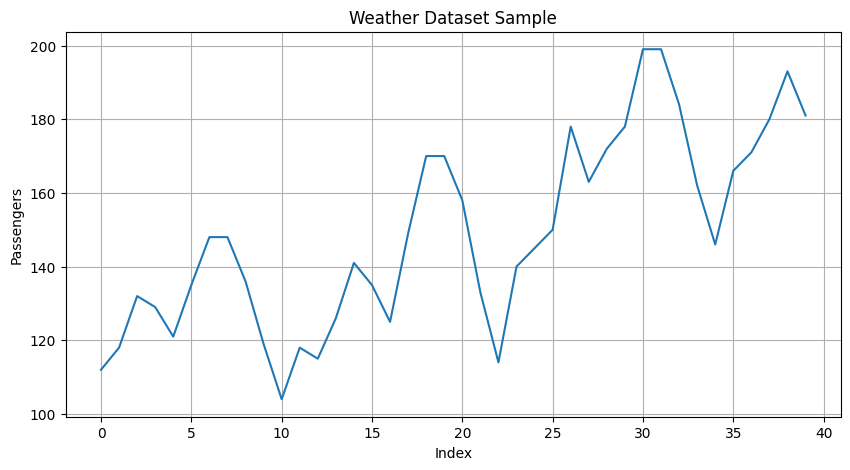

In [4]:
import pandas as pd

import matplotlib.pyplot as plt

# Fetch a small portion of a weather dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/flights.csv"
weather_data = pd.read_csv(url).head(40)

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(weather_data.index, weather_data['passengers'])
plt.xlabel('Index')
plt.ylabel('Passengers')
plt.title('Weather Dataset Sample')
plt.grid(True)
plt.show()

Filtering info: {'cut_freq': 18, 'fits_produced_threshold': 0.9998624566200814, 'energy_threshold': 1, 'final_energy_ratio': 1}


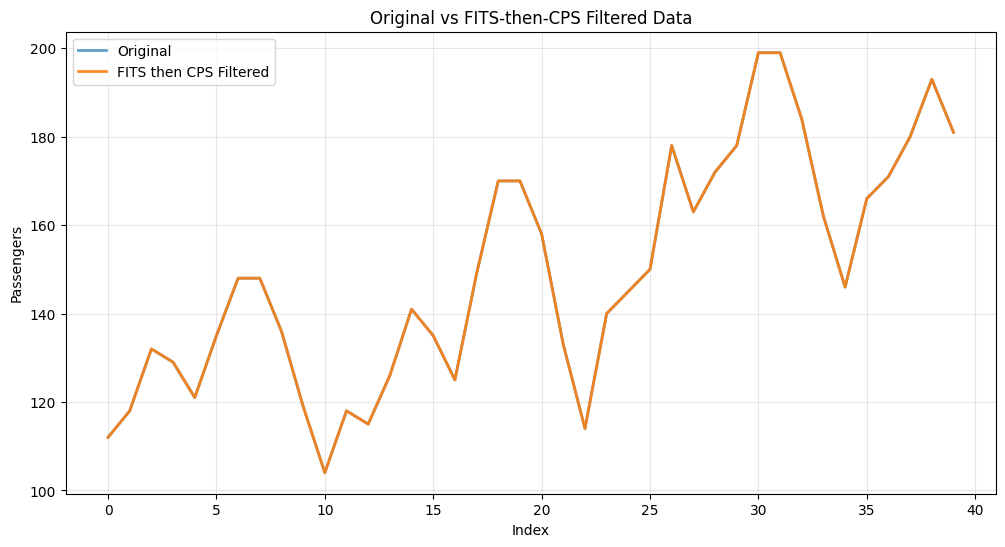

In [5]:
import sys
sys.path.append('/Users/shashwatkrishna/Desktop/Programming/llm-fft/lag-llama/data')
from filter_processor import FilterProcessor

# Create FilterProcessor with fits_then_cps method
filter_proc = FilterProcessor(
    method="fits_then_cps",
    base_period=12,  # Monthly data, 12 months per year
    h_order=2,
    energy_threshold=1,
    verbose=True
)

# Apply the filter
original_data = weather_data['passengers'].values
filtered_data, info = filter_proc._fits_then_cps_filter(original_data, base_period=12)

print(f"Filtering info: {info}")

# Plot comparison
plt.figure(figsize=(12, 6))
plt.plot(weather_data.index, original_data, label='Original', alpha=0.7, linewidth=2)
plt.plot(weather_data.index, filtered_data, label='FITS then CPS Filtered', alpha=0.9, linewidth=2)
plt.xlabel('Index')
plt.ylabel('Passengers')
plt.title('Original vs FITS-then-CPS Filtered Data')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
